## Leer CSV y tablas intermedias

In [2]:
pip install tqdm


In [3]:
!pip install tensorflow

In [4]:
# librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import os
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm.notebook import tqdm



In [5]:
df_transformadores = pd.read_csv('df_rellenado_con_nans.csv')
df_transformadores.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),...,SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),estacion,estacion_2
0,2021-01-01 00:30:00,6657.061100,392.181486,9087.688446,-89.524969,9393.958092,1439.777136,8747.844727,-132.386734,4363.275051,...,8986.115234,1787.867920,14563.25817,1948.054075,8607.710838,1346.077800,7858.459949,467.431158,verano,verano
1,2021-01-01 00:45:00,6600.084782,370.762348,9007.225990,-48.079155,9353.917122,1430.533409,8626.563477,-140.524490,4372.547626,...,8946.944336,1806.897827,14303.06339,2033.608913,8421.904564,1292.887449,7973.084927,486.736864,verano,verano
2,2021-01-01 01:00:00,6579.427719,385.641813,8908.111572,-71.154483,9084.967613,1380.251646,8546.049805,-164.159393,4297.423363,...,8749.440430,1736.990967,14161.10229,2011.147261,8396.206856,1296.282291,7781.050682,708.620131,verano,verano
3,2021-01-01 01:15:00,6523.938179,389.757663,8725.055695,-123.746052,8897.534370,1328.508615,8458.301758,-164.846237,4189.702034,...,8650.058594,1721.460083,14255.73540,2104.893208,8420.323372,1306.474209,7601.181507,1331.551671,verano,verano
4,2021-01-01 01:30:00,6389.933586,364.311010,8571.299553,-159.668446,8714.198112,1283.114433,8302.192383,-205.847855,4165.856361,...,8527.763672,1702.901367,13911.45802,1989.736915,8410.838127,1365.293384,7718.300819,1400.925994,verano,verano


In [6]:
# Asegurar de que la columna 'Date & Time' esté en formato de fecha
df_transformadores['Fecha y hora'] = pd.to_datetime(df_transformadores['Fecha y hora'])

# Filtrar el DataFrame para que solo contenga registros a partir del 01-09-2022
df_transformadores = df_transformadores[df_transformadores['Fecha y hora'] >= '2022-09-01']

# Muestra las primeras filas del DataFrame filtrado
df_transformadores.head()


,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),...,SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),estacion,estacion_2
58366,2022-09-01 00:00:00,7990.186035,-181.018677,11070.784570,-1156.055927,10469.624520,1574.626565,16182.03516,2889.797852,6582.792759,...,7696.346191,-245.543778,14293.01453,300.524324,9010.768890,551.931620,8714.805603,937.251568,primavera,invierno
58367,2022-09-01 00:15:00,7814.662598,-168.683701,10642.839430,-1138.835549,10122.302060,1577.088475,15651.35645,2957.378174,6615.210533,...,7628.229980,-177.161469,13913.02204,375.496417,8712.132454,526.338756,8408.253670,872.777283,primavera,invierno
58368,2022-09-01 00:30:00,7641.107910,-154.884232,10170.546530,-606.732845,9634.151459,1555.237055,15403.76367,2901.562256,6617.189884,...,7386.140137,-194.143158,13331.61640,366.602659,8432.621002,485.701501,8136.274338,890.410721,primavera,invierno
58369,2022-09-01 00:45:00,7435.472168,-183.479294,9809.725761,-626.313388,9161.982536,1526.732206,13710.66699,2547.108643,6251.700401,...,7131.555176,-255.740509,12858.40511,299.731404,8020.611763,378.583282,7978.886604,922.354996,primavera,invierno
58370,2022-09-01 01:00:00,7281.242676,-245.556778,9443.894386,-683.206677,8846.229553,1475.966573,14570.70117,2749.611084,6449.150085,...,7157.196777,-214.045502,12356.49300,212.636665,7949.328899,414.491951,7726.144314,876.240313,primavera,invierno


In [7]:
# Leer archivos excel
tabla_intermedia = pd.read_excel("Tabla_intermedia_principal.xlsx")
info_pmgds = pd.read_excel("Info_PMGDs.xlsx")

In [8]:
tabla_intermedia.columns

Index(['Zona', 'Subestación', 'TAG SCADA Potencia Aparente [MW]',
       'Data meteorologica', 'Capacidad Transformador [MVA]', 'Conexión PMGD',
       'Alimentador'],
      dtype='object')

In [9]:
df_meteo = pd.read_csv('df_meteorologico.csv', sep=";")
df_meteo.head()

,Date & Time,Estacion,Temp - °C,Punto de rocío - °C,Bulbo Húmedo - °C,Velocidad del Viento Media - km/h,Hum - %,Barómetro - mb,Lluvia - mm,Días-grado de enfriamiento,Días-grado de calentamiento,Estacion_Anual
0,2023-06-24 00:00:00,Los Andes,12.0,11.0,12.0,0.0,93.0,1023.0,0.6,0.0,0.123,invierno
1,2023-06-24 00:00:00,Baron,16.0,15.0,16.0,6.0,92.0,1018.4,0.3,0.0,0.021,invierno
2,2023-06-24 00:00:00,Curauma,15.0,14.0,14.0,0.0,98.0,1020.8,0.0,0.0,0.039,invierno
3,2023-06-24 00:00:00,La Cruz,17.0,14.0,15.0,1.0,84.0,1020.5,0.0,0.0,0.012,invierno
4,2023-06-24 00:15:00,Curauma,15.0,14.0,14.0,1.0,98.0,1020.6,0.3,0.0,0.038,invierno


In [10]:
df_meteo.tail()

,Date & Time,Estacion,Temp - °C,Punto de rocío - °C,Bulbo Húmedo - °C,Velocidad del Viento Media - km/h,Hum - %,Barómetro - mb,Lluvia - mm,Días-grado de enfriamiento,Días-grado de calentamiento,Estacion_Anual
251135,2025-04-07 23:45:00,Los Andes,18.0,2.0,7.0,3.0,35.0,1013.7,0.0,0.0,0.005,otoño
251136,2025-04-08 00:00:00,La Cruz,11.0,9.0,10.0,0.0,91.0,1013.3,0.0,0.0,0.026,otoño
251137,2025-04-08 00:00:00,Baron,14.0,11.0,12.0,2.0,84.0,1012.1,0.0,0.0,0.047,otoño
251138,2025-04-08 00:00:00,Curauma,10.0,9.0,9.0,0.0,89.0,1014.0,0.0,0.0,0.084,otoño
251139,2025-04-08 00:00:00,Los Andes,18.0,2.0,7.0,3.0,34.0,1013.6,0.0,0.0,0.002,otoño


In [11]:
df_meteo.columns

Index(['Date & Time', 'Estacion', 'Temp - °C', 'Punto de rocío - °C',
       'Bulbo Húmedo - °C', 'Velocidad del Viento Media - km/h', 'Hum - %',
       'Barómetro - mb', 'Lluvia - mm', 'Días-grado de enfriamiento',
       'Días-grado de calentamiento', 'Estacion_Anual'],
      dtype='object')

## Conversión de unidades

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import os

transformador_columnas_p = [
 "SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW)",
 "SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW)",
 "SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW)",
 "SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW)",
 "SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW)",
 "SE_Bosquemar.Trf_Bosquemar_T1 Potencia activa media (kW)",
 "SE_Bosquemar.Trf_Bosquemar_T2 Real Power Mean (kW)",
 "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia activa media (kW)",
 "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia activa media (kW)",
 "SE_San_Rafael.Trf_San_Rafael_T1 Potencia activa media (kW)",
 "SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW)",
 "SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW)",
 "SE_Calera.Trf_Calera_T2 Potencia activa media (kW)"
]


#potencia reactiva
transformador_columnas_q = [
   "SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr)",
    "SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr)",
    "SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr)",
    "SE_Concon.Trf_Concon_T2_2 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T1 Potencia reactiva media (kVAr)",
    "SE_Bosquemar.Trf_Bosquemar_T2 Reactive Power Mean (kVAr)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T1 Potencia reactiva media (kVAr)",
    "SE_Playa_Ancha.Trf_Playa_Ancha_T2 Potencia reactiva media (kVAr)",
    "SE_San_Rafael.Trf_San_Rafael_T1 Potencia reactiva media (kVAr)",
    "SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr)",
    "SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr)",
    "SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr)"]

todas_las_columnas = transformador_columnas_p + transformador_columnas_q


In [14]:
# Unir ambas listas de columnas
columnas_a_convertir = transformador_columnas_p + transformador_columnas_q

# Aplicar la conversión: dividir por 1000
df_transformadores[columnas_a_convertir] = df_transformadores[columnas_a_convertir] / 1000

In [15]:
df_transformadores.head()

,Fecha y hora,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activa media (kW),SE_Valparaiso.Trf_Valparaiso_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T1 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T1 Potencia reactiva media (kVAr),SE_Placeres.Trf_Placeres_T2 Potencia activa media (kW),SE_Placeres.Trf_Placeres_T2 Potencia reactiva media (kVAr),SE_Placilla.Trf_Placilla_T2 Potencia activa media (kW),SE_Placilla.Trf_Placilla_T2 Potencia reactiva media (kVAr),SE_Concon.Trf_Concon_T2_2 Potencia activa media (kW),...,SE_San_Rafael.Trf_San_Rafael_T3 Potencia activa media (kW),SE_San_Rafael.Trf_San_Rafael_T3 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T1 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T1 Potencia reactiva media (kVAr),SE_San_Felipe.Trf_San_Felipe_T2 Potencia activa media (kW),SE_San_Felipe.Trf_San_Felipe_T2 Potencia reactiva media (kVAr),SE_Calera.Trf_Calera_T2 Potencia activa media (kW),SE_Calera.Trf_Calera_T2 Potencia reactiva media (kVAr),estacion,estacion_2
58366,2022-09-01 00:00:00,7.990186,-0.181019,11.070785,-1.156056,10.469625,1.574627,16.182035,2.889798,6.582793,...,7.696346,-0.245544,14.293015,0.300524,9.010769,0.551932,8.714806,0.937252,primavera,invierno
58367,2022-09-01 00:15:00,7.814663,-0.168684,10.642839,-1.138836,10.122302,1.577088,15.651356,2.957378,6.615211,...,7.628230,-0.177161,13.913022,0.375496,8.712132,0.526339,8.408254,0.872777,primavera,invierno
58368,2022-09-01 00:30:00,7.641108,-0.154884,10.170547,-0.606733,9.634151,1.555237,15.403764,2.901562,6.617190,...,7.386140,-0.194143,13.331616,0.366603,8.432621,0.485702,8.136274,0.890411,primavera,invierno
58369,2022-09-01 00:45:00,7.435472,-0.183479,9.809726,-0.626313,9.161983,1.526732,13.710667,2.547109,6.251700,...,7.131555,-0.255741,12.858405,0.299731,8.020612,0.378583,7.978887,0.922355,primavera,invierno
58370,2022-09-01 01:00:00,7.281243,-0.245557,9.443894,-0.683207,8.846230,1.475967,14.570701,2.749611,6.449150,...,7.157197,-0.214046,12.356493,0.212637,7.949329,0.414492,7.726144,0.876240,primavera,invierno


In [16]:
# Hacer división en invierte y no invierte:
# Clasificación manual de transformadores
transformadores_sinpmgd = [
 "Valparaiso_T1",
 "Placeres_T1",
 "Placeres_T2",
 "Placilla_T2",
 "Bosquemar_T1",
 "Bosquemar_T2",
 "Playa_Ancha_T1",
 "Playa_Ancha_T2",
 "Calera_T2"]

transformadores_pmgd = [
 "Concon_T2",
 "San_Rafael_T1",
 "San_Rafael_T3",
 "San_Felipe_T1",
 "San_Felipe_T2",
]


## Armar DF para entrenamiento

**Tabla de "Metadatos"**

In [19]:
# 1. Función para normalizar texto
def normalizar_texto(serie):
    return serie.astype(str).str.strip().str.lower().apply(
        lambda x: unicodedata.normalize('NFKD', x).encode('ascii', errors='ignore').decode('utf-8')
    )

# 2.Normalizar los nombres de los transformadores
tabla_intermedia['Alimentador'] = normalizar_texto(tabla_intermedia['Alimentador'])
info_pmgds['Alimentador'] = normalizar_texto(info_pmgds['Alimentador'])

# 3. Expandir alimentadores que tienen múltiples entradas
tabla_expandida = tabla_intermedia.assign(
    Alimentador=tabla_intermedia['Alimentador'].str.split(',')
).explode('Alimentador')
tabla_expandida['Alimentador'] = tabla_expandida['Alimentador'].str.strip()

#  4. Sumar potencia PMGD por alimentador
potencia_pmgd = info_pmgds.groupby('Alimentador')['Potencia instalada  [MW]'].sum().reset_index()
potencia_pmgd.columns = ['Alimentador', 'pmgd_total_mw']

# 5. Enriquecer datos con potencia PMGD y agrupar transformador
tabla_enriquecida = tabla_expandida.merge(potencia_pmgd, on='Alimentador', how='left')

caracteristicas_transformador = tabla_enriquecida.groupby('TAG SCADA Potencia Aparente [MW]').agg({
    'pmgd_total_mw': 'sum',
    'Capacidad Transformador [MVA]': 'first',
    'Conexión PMGD': 'first',
    'Zona': 'first',
    'Subestación': 'first'
}).reset_index().rename(columns={
    'TAG SCADA Potencia Aparente [MW]': 'transformador',
    'Capacidad Transformador [MVA]': 'capacidad_mva',
    'Conexión PMGD': 'conexion_pmgd',
    'Zona': 'zona',
    'Subestación': 'subestacion'
})

def clasificar_grupo(col):
    if col in transformadores_pmgd:
        return 'invierte'
    elif col in transformadores_sinpmgd:
        return 'no invierte'
    else:
        return 'otro'

# 6.Limpiar y transformar variables
caracteristicas_transformador['conexion_pmgd'] = caracteristicas_transformador['conexion_pmgd'].map({'Si': 1, 'No': 0})
caracteristicas_transformador['pmgd_total_mw'] = caracteristicas_transformador['pmgd_total_mw'].fillna(0)
caracteristicas_transformador['zona'] = caracteristicas_transformador['zona'].str.replace('zona_', '', regex=False)
caracteristicas_transformador['subestacion'] = caracteristicas_transformador['subestacion'].str.replace('subestacion_', '', regex=False)
caracteristicas_transformador['grupo'] = caracteristicas_transformador['transformador'].apply(clasificar_grupo)


# 7. Vista final tabla con las características técnicas y geográficas por transformador
print(" Vista final tabla con las características técnicas y geográficas por transformador:")
display(caracteristicas_transformador)


 Vista final tabla con las características técnicas y geográficas por transformador:


,transformador,pmgd_total_mw,capacidad_mva,conexion_pmgd,zona,subestacion,grupo
0,Bosquemar_T1,0.000,30.0,0,Zona Costa,Bosquemar,no invierte
1,Bosquemar_T2,0.000,30.0,0,Zona Costa,Bosquemar,no invierte
2,Calera_T2,0.000,22.5,0,Zona Valle,Calera,no invierte
3,Concon_T2,11.990,25.0,1,Zona Costa,Concon,invierte
4,Placeres_T1,0.215,30.0,1,Zona Costa,Placeres,no invierte
5,Placeres_T2,3.000,25.0,1,Zona Costa,Placeres,no invierte
6,Placilla_T2,2.500,30.0,1,Zona Costa,Placilla,no invierte
7,Playa_Ancha_T1,0.000,20.0,0,Zona Costa,Playa Ancha,no invierte
8,Playa_Ancha_T2,0.000,22.4,0,Zona Costa,Playa Ancha,no invierte
9,San_Felipe_T1,23.541,50.0,1,Zona Valle,San Felipe,invierte


**LEER BIEN LAS COLUMNAS Y ASIGNAR GRUPO P O Q A CADA UNA**

In [21]:
columnas_info = []
for col in todas_las_columnas:
    # Obtener la parte después de SE_xxx.
    partes = col.split('.')
    if len(partes) > 1:
        nombre_raw = partes[1]
    else:
        nombre_raw = partes[0]

    # Limpiar el nombre del transformador
    nombre_limpio = nombre_raw.replace("Trf_", "").strip()
    nombre_limpio = nombre_limpio.split(" Potencia")[0]
    nombre_limpio = nombre_limpio.split(" Real Power")[0]
    nombre_limpio = nombre_limpio.split(" Reactive Power")[0]
    nombre_limpio = nombre_limpio.strip()

    # Corrección específica para Concon_T2_2
    if nombre_limpio == "Concon_T2_2":
        nombre_limpio = "Concon_T2"

    # Detectar tipo de variable
    col_lower = col.lower()
    if 'reactiva' in col_lower or 'reactive power' in col_lower:
        tipo = 'Q'
    else:
        tipo = 'P'

    grupo = clasificar_grupo(col)

    columnas_info.append({
        'columna': col,
        'transformador': nombre_limpio,
        'tipo': tipo,
        'grupo': grupo
    })

df_columnas_info = pd.DataFrame(columnas_info)

df_columnas_info['transformador'].unique()

array(['Valparaiso_T1', 'Placeres_T1', 'Placeres_T2', 'Placilla_T2',
       'Concon_T2', 'Bosquemar_T1', 'Bosquemar_T2', 'Playa_Ancha_T1',
       'Playa_Ancha_T2', 'San_Rafael_T1', 'San_Rafael_T3',
       'San_Felipe_T1', 'San_Felipe_T2', 'Calera_T2'], dtype=object)

In [22]:
df_columnas_info.head()

,columna,transformador,tipo,grupo
0,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P,otro
1,SE_Placeres.Trf_Placeres_T1 Potencia activa me...,Placeres_T1,P,otro
2,SE_Placeres.Trf_Placeres_T2 Potencia activa me...,Placeres_T2,P,otro
3,SE_Placilla.Trf_Placilla_T2 Potencia activa me...,Placilla_T2,P,otro
4,SE_Concon.Trf_Concon_T2_2 Potencia activa medi...,Concon_T2,P,otro


**AGREGAR FEAUTURES**

In [24]:
# CREAR VARIABLES TEMPORALES DESDE 'Fecha y hora' 
df = df_transformadores.copy()

df = df.drop(columns=['estacion_2', 'estacion'])

# Extraer variables temporales lineales
df['hora'] = df['Fecha y hora'].dt.hour
df['minuto'] = df['Fecha y hora'].dt.minute
df['dia'] = df['Fecha y hora'].dt.day
df['mes'] = df['Fecha y hora'].dt.month
df['año'] = df['Fecha y hora'].dt.year
df['dia_semana'] = df['Fecha y hora'].dt.weekday  # 0: lunes, 6: domingo
df['es_laboral'] = (df['dia_semana'] < 5).astype(int)

# Codificación cíclica de variables temporales
df['hora_sin'] = np.sin(2 * np.pi * df['hora'] / 24)
df['hora_cos'] = np.cos(2 * np.pi * df['hora'] / 24)

df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)

df['dia_semana_sin'] = np.sin(2 * np.pi * df['dia_semana'] / 7)
df['dia_semana_cos'] = np.cos(2 * np.pi * df['dia_semana'] / 7)

# Estaciones (hemisferio sur)
def asignar_estacion(mes):
    if mes in [12, 1, 2]:
        return 'verano'
    elif mes in [3, 4, 5]:
        return 'otoño'
    elif mes in [6, 7, 8]:
        return 'invierno'
    else:
        return 'primavera'

df['estacion'] = df['mes'].apply(asignar_estacion)
df = pd.get_dummies(df, columns=['estacion'])

df['fecha'] = df['Fecha y hora'].dt.date

# CONSTRUIR DF LARGO CON TODAS LAS SERIES
df_long = []

for _, row in df_columnas_info.iterrows():
    col = row['columna']
    transformador = row['transformador']
    grupo = row['grupo']
    tipo = row['tipo']

    if col in df.columns:
        columnas_base = [
            'Fecha y hora',
            'hora_sin', 'hora_cos',
            'mes_sin', 'mes_cos',
            'dia_semana_sin', 'dia_semana_cos',
            'minuto', 'dia', 'año', 'es_laboral',
            'estacion_invierno', 'estacion_otoño', 'estacion_primavera'
        ]

        columnas_finales = columnas_base

        tmp = df[columnas_finales].copy()
        tmp['valor'] = df[col]
        tmp['columna'] = col
        tmp['transformador'] = transformador
        tmp['tipo'] = tipo

        df_long.append(tmp)

df_largo = pd.concat(df_long).reset_index(drop=True)



In [25]:
df_largo.columns

Index(['Fecha y hora', 'hora_sin', 'hora_cos', 'mes_sin', 'mes_cos',
       'dia_semana_sin', 'dia_semana_cos', 'minuto', 'dia', 'año',
       'es_laboral', 'estacion_invierno', 'estacion_otoño',
       'estacion_primavera', 'valor', 'columna', 'transformador', 'tipo'],
      dtype='object')

In [26]:
print(" Vista final tabla con las características técnicas y geográficas por transformador:")
display(df_largo)

 Vista final tabla con las características técnicas y geográficas por transformador:


,Fecha y hora,hora_sin,hora_cos,mes_sin,mes_cos,dia_semana_sin,dia_semana_cos,minuto,dia,año,es_laboral,estacion_invierno,estacion_otoño,estacion_primavera,valor,columna,transformador,tipo
0,2022-09-01 00:00:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,0,1,2022,1,False,False,True,7.990186,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P
1,2022-09-01 00:15:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,15,1,2022,1,False,False,True,7.814663,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P
2,2022-09-01 00:30:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,30,1,2022,1,False,False,True,7.641108,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P
3,2022-09-01 00:45:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,45,1,2022,1,False,False,True,7.435472,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P
4,2022-09-01 01:00:00,0.258819,0.965926,-1.000000,-1.836970e-16,0.433884,-0.900969,0,1,2022,1,False,False,True,7.281243,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588567,2025-04-20 23:00:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,0,20,2025,0,False,True,False,0.397411,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q
2588568,2025-04-20 23:15:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,15,20,2025,0,False,True,False,0.378730,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q
2588569,2025-04-20 23:30:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,30,20,2025,0,False,True,False,0.418588,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q
2588570,2025-04-20 23:45:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,45,20,2025,0,False,True,False,0.531944,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q


**MERGE ENTRE DF_LARGO Y CARACTERISTICAS TRANSFORMADOR**

In [28]:
df_final = df_largo.merge(caracteristicas_transformador, on='transformador', how='left')


In [29]:
display(df_final)

,Fecha y hora,hora_sin,hora_cos,mes_sin,mes_cos,dia_semana_sin,dia_semana_cos,minuto,dia,año,...,valor,columna,transformador,tipo,pmgd_total_mw,capacidad_mva,conexion_pmgd,zona,subestacion,grupo
0,2022-09-01 00:00:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,0,1,2022,...,7.990186,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P,4.0,30.0,1,Zona Costa,Valparaíso,no invierte
1,2022-09-01 00:15:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,15,1,2022,...,7.814663,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P,4.0,30.0,1,Zona Costa,Valparaíso,no invierte
2,2022-09-01 00:30:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,30,1,2022,...,7.641108,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P,4.0,30.0,1,Zona Costa,Valparaíso,no invierte
3,2022-09-01 00:45:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,45,1,2022,...,7.435472,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P,4.0,30.0,1,Zona Costa,Valparaíso,no invierte
4,2022-09-01 01:00:00,0.258819,0.965926,-1.000000,-1.836970e-16,0.433884,-0.900969,0,1,2022,...,7.281243,SE_Valparaiso.Trf_Valparaiso_T1 Potencia activ...,Valparaiso_T1,P,4.0,30.0,1,Zona Costa,Valparaíso,no invierte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588567,2025-04-20 23:00:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,0,20,2025,...,0.397411,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q,0.0,22.5,0,Zona Valle,Calera,no invierte
2588568,2025-04-20 23:15:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,15,20,2025,...,0.378730,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q,0.0,22.5,0,Zona Valle,Calera,no invierte
2588569,2025-04-20 23:30:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,30,20,2025,...,0.418588,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q,0.0,22.5,0,Zona Valle,Calera,no invierte
2588570,2025-04-20 23:45:00,-0.258819,0.965926,0.866025,-5.000000e-01,-0.781831,0.623490,45,20,2025,...,0.531944,SE_Calera.Trf_Calera_T2 Potencia reactiva medi...,Calera_T2,Q,0.0,22.5,0,Zona Valle,Calera,no invierte


**AGREGAR DATA METEOROLOGICA**

In [31]:
# Normalizar nombre de estaciones
df_meteo['Estacion'] = normalizar_texto(df_meteo['Estacion'])
tabla_intermedia['Data meteorologica'] = normalizar_texto(tabla_intermedia['Data meteorologica'])

# Agregar estación meteorológica a cada transformador
caracteristicas_transformador = caracteristicas_transformador.merge(
    tabla_intermedia[['TAG SCADA Potencia Aparente [MW]', 'Data meteorologica']],
    left_on='transformador',
    right_on='TAG SCADA Potencia Aparente [MW]',
    how='left'
).rename(columns={'Data meteorologica': 'estacion_meteo'}).drop(columns=['TAG SCADA Potencia Aparente [MW]'])

# Normalizar fechas y horas en df_meteo
df_meteo['Date & Time'] = pd.to_datetime(df_meteo['Date & Time'])
df_meteo['fecha_hora'] = df_meteo['Date & Time'].dt.floor('min')

# Agregar fecha_hora a df_final para emparejar
df_final['fecha_hora'] = pd.to_datetime(df_final['Fecha y hora']).dt.floor('min')

# Unir df_final con estación meteorológica
df_final = df_final.merge(
    caracteristicas_transformador[['transformador', 'estacion_meteo']],
    on='transformador', how='left'
)

# Reducir df_meteo para merge y unir
df_meteo_reducido = df_meteo.drop(columns=['Date & Time'])  # evitar colisión
df_final = df_final.merge(
    df_meteo_reducido,
    left_on=['fecha_hora', 'estacion_meteo'],
    right_on=['fecha_hora', 'Estacion'],
    how='left'
).drop(columns=['Estacion'])


In [32]:
limite_fecha = pd.to_datetime("2025-04-08 00:00:00")
df_final = df_final[df_final['fecha_hora'] <= limite_fecha]

In [33]:
display(df_final)

,Fecha y hora,hora_sin,hora_cos,mes_sin,mes_cos,dia_semana_sin,dia_semana_cos,minuto,dia,año,...,Temp - °C,Punto de rocío - °C,Bulbo Húmedo - °C,Velocidad del Viento Media - km/h,Hum - %,Barómetro - mb,Lluvia - mm,Días-grado de enfriamiento,Días-grado de calentamiento,Estacion_Anual
0,2022-09-01 00:00:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,0,1,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-01 00:15:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,15,1,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-01 00:30:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,30,1,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-01 00:45:00,0.000000,1.000000,-1.000000,-1.836970e-16,0.433884,-0.900969,45,1,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-01 01:00:00,0.258819,0.965926,-1.000000,-1.836970e-16,0.433884,-0.900969,0,1,2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587319,2025-04-07 23:00:00,-0.258819,0.965926,0.866025,-5.000000e-01,0.000000,1.000000,0,7,2025,...,12.0,10.0,11.0,0.0,90.0,1013.5,0.0,0.0,0.023,otoño
2587320,2025-04-07 23:15:00,-0.258819,0.965926,0.866025,-5.000000e-01,0.000000,1.000000,15,7,2025,...,11.0,10.0,10.0,0.0,89.0,1013.4,0.0,0.0,0.024,otoño
2587321,2025-04-07 23:30:00,-0.258819,0.965926,0.866025,-5.000000e-01,0.000000,1.000000,30,7,2025,...,11.0,9.0,10.0,0.0,90.0,1013.5,0.0,0.0,0.025,otoño
2587322,2025-04-07 23:45:00,-0.258819,0.965926,0.866025,-5.000000e-01,0.000000,1.000000,45,7,2025,...,11.0,9.0,10.0,0.0,90.0,1013.4,0.0,0.0,0.026,otoño


In [34]:
df_final.columns

Index(['Fecha y hora', 'hora_sin', 'hora_cos', 'mes_sin', 'mes_cos',
       'dia_semana_sin', 'dia_semana_cos', 'minuto', 'dia', 'año',
       'es_laboral', 'estacion_invierno', 'estacion_otoño',
       'estacion_primavera', 'valor', 'columna', 'transformador', 'tipo',
       'pmgd_total_mw', 'capacidad_mva', 'conexion_pmgd', 'zona',
       'subestacion', 'grupo', 'fecha_hora', 'estacion_meteo', 'Temp - °C',
       'Punto de rocío - °C', 'Bulbo Húmedo - °C',
       'Velocidad del Viento Media - km/h', 'Hum - %', 'Barómetro - mb',
       'Lluvia - mm', 'Días-grado de enfriamiento',
       'Días-grado de calentamiento', 'Estacion_Anual'],
      dtype='object')

## San Felipe T1

In [62]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm.notebook import tqdm
import random
import tensorflow as tf
from tensorflow.keras.initializers import GlorotUniform

#  Reproducibilidad total 
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

#  MAPE personalizado
def calcular_mape(y_true, y_pred, min_denominador=1e-3):
    denom = np.maximum(np.abs(y_true), min_denominador)
    return np.mean(np.abs((y_true - y_pred) / denom))

#  Crear ventanas
def crear_ventanas(df, col, lag, horizonte):
    X, y, fechas = [], [], []
    serie = df[col].values
    for i in range(lag, len(serie) - horizonte + 1):
        X.append(serie[i - lag:i])
        y.append(serie[i:i + horizonte])
        fechas.append(df['Fecha y hora'].iloc[i + horizonte - 1])
    return np.array(X), np.array(y), fechas

# Evaluación de configuración 
def evaluar_una_configuracion(df, col_obj, lag, horizonte, units, batch_size, epochs, fecha):
    tiempo_inicio = time.time()

    #  Fechas 
    fecha_inicio_test = pd.to_datetime(fecha)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)

    inicio_entrenamiento = fecha_inicio_test - pd.Timedelta(days=365 + 21)
    fin_entrenamiento = fecha_inicio_test - pd.Timedelta(weeks=3, days=1)

    df_train = df[(df['Fecha y hora'] >= inicio_entrenamiento) & (df['Fecha y hora'] <= fin_entrenamiento)].copy()
    delta_lag = pd.Timedelta(minutes=15 * lag)
    df_test = df[(df['Fecha y hora'] >= (fecha_inicio_test - delta_lag)) & (df['Fecha y hora'] < fecha_fin_test)].copy()

    if len(df_test) < (lag + horizonte):
        print(f" No hay suficientes datos para test: {len(df_test)} disponibles, se necesitan al menos {lag + horizonte}")
        return None, None, None

    #  Escalado
    scaler = MinMaxScaler()
    df_train.loc[:, col_obj] = scaler.fit_transform(df_train[[col_obj]])
    df_test.loc[:, col_obj] = scaler.transform(df_test[[col_obj]])

    # Ventanas 
    X_train, y_train, _ = crear_ventanas(df_train, col_obj, lag, horizonte)
    X_test, y_test, fechas_pred = crear_ventanas(df_test, col_obj, lag, horizonte)

    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))


    #  Modelo 
    model = Sequential()
    model.add(LSTM(units=units,
                   activation='tanh',
                   input_shape=(lag, 1),
                   kernel_initializer=GlorotUniform(seed=42),
                   recurrent_initializer=GlorotUniform(seed=42)))
    model.add(Dense(horizonte, kernel_initializer=GlorotUniform(seed=42)))
    model.compile(optimizer='adam', loss='mse')

    print("\n Entrenando modelo:")
    for i in tqdm(range(epochs), desc="Progreso", unit="epoch"):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, shuffle=False, verbose=0)

    #  Evaluación en entrenamiento usando una semana completa y usando la misma lógica de test 
    fecha_fin_eval_train = df_train['Fecha y hora'].max()
    fecha_inicio_eval_train = fecha_fin_eval_train - pd.Timedelta(days=7)

    eval_train = df_train[(df_train['Fecha y hora'] >= (fecha_inicio_eval_train - delta_lag)) &
                          (df_train['Fecha y hora'] <= fecha_fin_eval_train)].copy()

    min_filas_requeridas = lag + horizonte
    if len(eval_train) < min_filas_requeridas:
        print(f" Solo hay {len(eval_train)} filas en la evaluación de entrenamiento. Se requieren al menos {min_filas_requeridas}.")
        return None, None, None

    X_train_eval, y_train_eval, _ = crear_ventanas(eval_train, col_obj, lag, horizonte)
    print(f" Ventanas creadas para entrenamiento: {X_train_eval.shape[0]}")
    print(f" Ventanas creadas para test: {X_test.shape[0]}")

    if X_train_eval.shape[0] == 0:
        print(" No se pudieron crear ventanas con los datos de entrenamiento.")
        return None, None, None

    print(f" Ventanas creadas para entrenamiento: {X_train_eval.shape[0]}")

    X_train_eval = X_train_eval.reshape((X_train_eval.shape[0], X_train_eval.shape[1], 1))


    y_train_pred = model.predict(X_train_eval)
    y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).reshape(y_train_pred.shape)
    y_train_real_inv = scaler.inverse_transform(y_train_eval.reshape(-1, 1)).reshape(y_train_eval.shape)

    mae_train = mean_absolute_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten())
    rmse_train = np.sqrt(mean_squared_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten()))
    mape_train = calcular_mape(y_train_real_inv.flatten(), y_train_pred_inv.flatten()) * 100

    print(f"\n ENTRENAMIENTO")
    print(f"MAE: {mae_train:.2f} | RMSE: {rmse_train:.2f} | MAPE: {mape_train:.2f}%")

    #  Evaluación test 
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
    y_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

    mae = mean_absolute_error(y_real_inv.flatten(), y_pred_inv.flatten())
    rmse = np.sqrt(mean_squared_error(y_real_inv.flatten(), y_pred_inv.flatten()))
    mape = calcular_mape(y_real_inv.flatten(), y_pred_inv.flatten(), min_denominador=1.0) * 100

    print(f"\n VALIDACIÓN SEMANAL")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")

    resumen = pd.DataFrame({
        'Dataset': ['Entrenamiento', 'Validación'],
        'MAE': [mae_train, mae],
        'RMSE': [rmse_train, rmse],
        'MAPE (%)': [mape_train, mape]
    })

    try:
        from IPython.display import display
    except ImportError:
        display = print
    display(resumen.round(2))

    #  Gráfico 
    plt.figure(figsize=(14, 5))
    plt.plot(y_real_inv[0], label='Real')
    plt.plot(y_pred_inv[0], label='Predicho')
    plt.title(f'Predicción - Semana desde {fecha_inicio_test.date()}')
    plt.xlabel('Intervalo de 15 minutos')
    plt.ylabel('Potencia activa (kW)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    tiempo_total = time.time() - tiempo_inicio
    print(f"\n⏱ Tiempo de ejecución: {round(tiempo_total / 60, 2)} minutos")

    return mae, rmse, mape



 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
 Ventanas creadas para entrenamiento: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step

 ENTRENAMIENTO
MAE: 0.49 | RMSE: 0.57 | MAPE: 11.31%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step

 VALIDACIÓN SEMANAL
MAE: 0.87 | RMSE: 1.13 | MAPE: 22.73%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.49,0.57,11.31
1,Validación,0.87,1.13,22.73


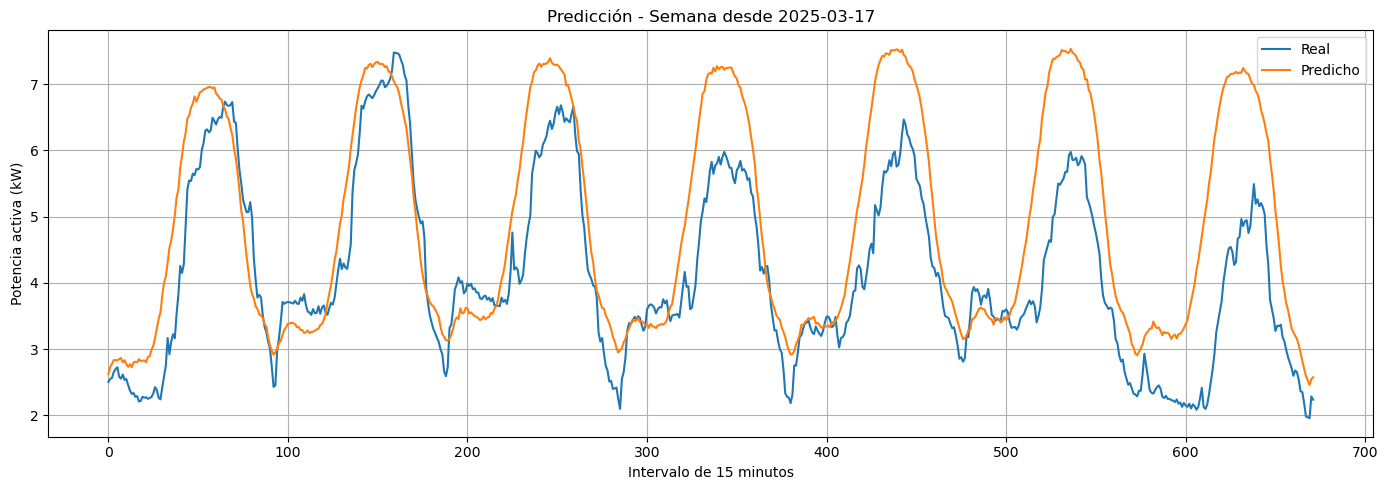


⏱ Tiempo de ejecución: 7.56 minutos


In [64]:
df_modelo = df_final[(df_final['transformador'] == 'San_Felipe_T1') & (df_final['tipo'] == 'Q')].copy()

# Asegúrate de ordenar
df_modelo = df_modelo.sort_values('Fecha y hora')

# Ejecutar entrenamiento
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-03-17"
)



 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
 Ventanas creadas para entrenamiento: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step

 ENTRENAMIENTO
MAE: 0.44 | RMSE: 0.57 | MAPE: 10.82%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step

 VALIDACIÓN SEMANAL
MAE: 0.75 | RMSE: 0.91 | MAPE: 18.51%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.44,0.57,10.82
1,Validación,0.75,0.91,18.51


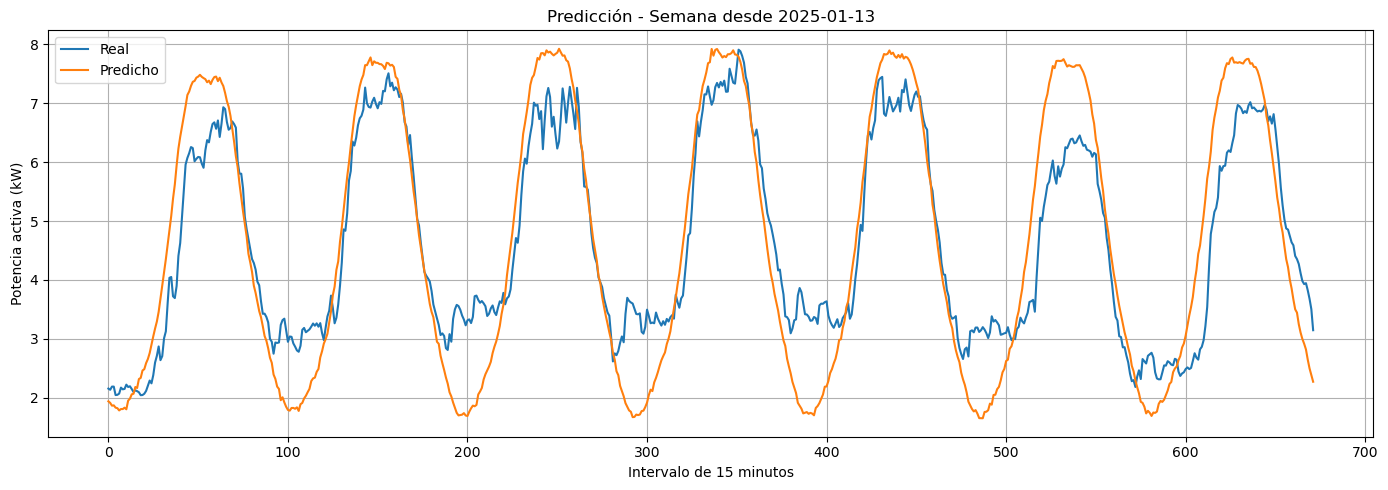


⏱ Tiempo de ejecución: 7.86 minutos


In [65]:
# Ejecutar entrenamiento
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-01-13"
)



 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
 Ventanas creadas para entrenamiento: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step

 ENTRENAMIENTO
MAE: 0.70 | RMSE: 0.91 | MAPE: 49.19%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step

 VALIDACIÓN SEMANAL
MAE: 1.82 | RMSE: 2.38 | MAPE: 52.09%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.70,0.91,49.19
1,Validación,1.82,2.38,52.09


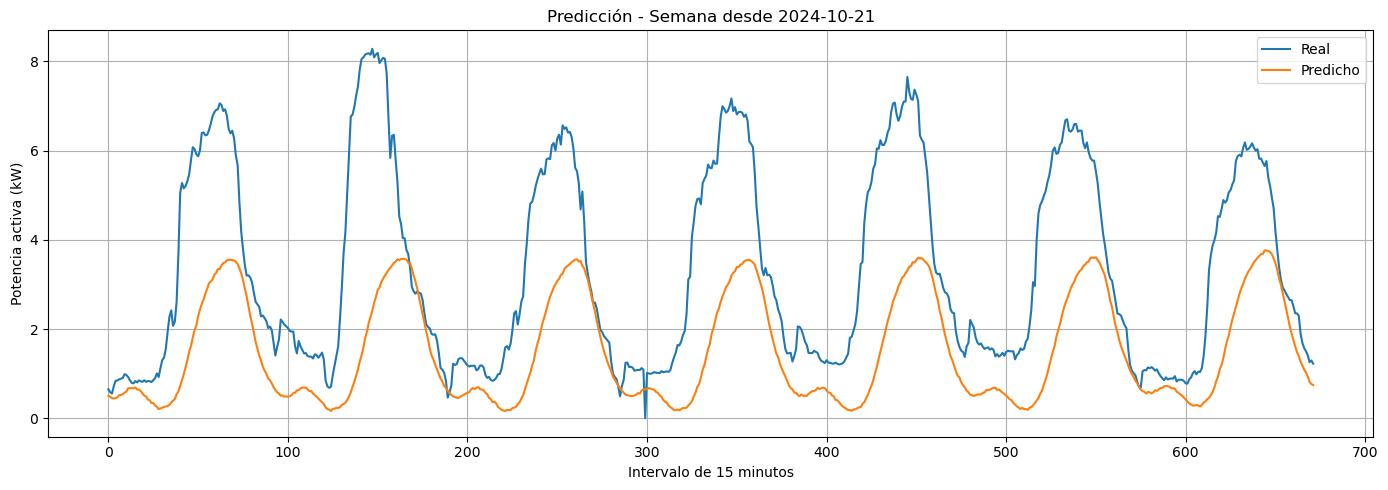


⏱ Tiempo de ejecución: 7.53 minutos


In [66]:
# Ejecutar entrenamiento
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-10-21"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
 Ventanas creadas para entrenamiento: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step

 ENTRENAMIENTO
MAE: 0.60 | RMSE: 0.78 | MAPE: 8751.49%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step

 VALIDACIÓN SEMANAL
MAE: 0.92 | RMSE: 1.14 | MAPE: 72.56%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.60,0.78,8751.49
1,Validación,0.92,1.14,72.56


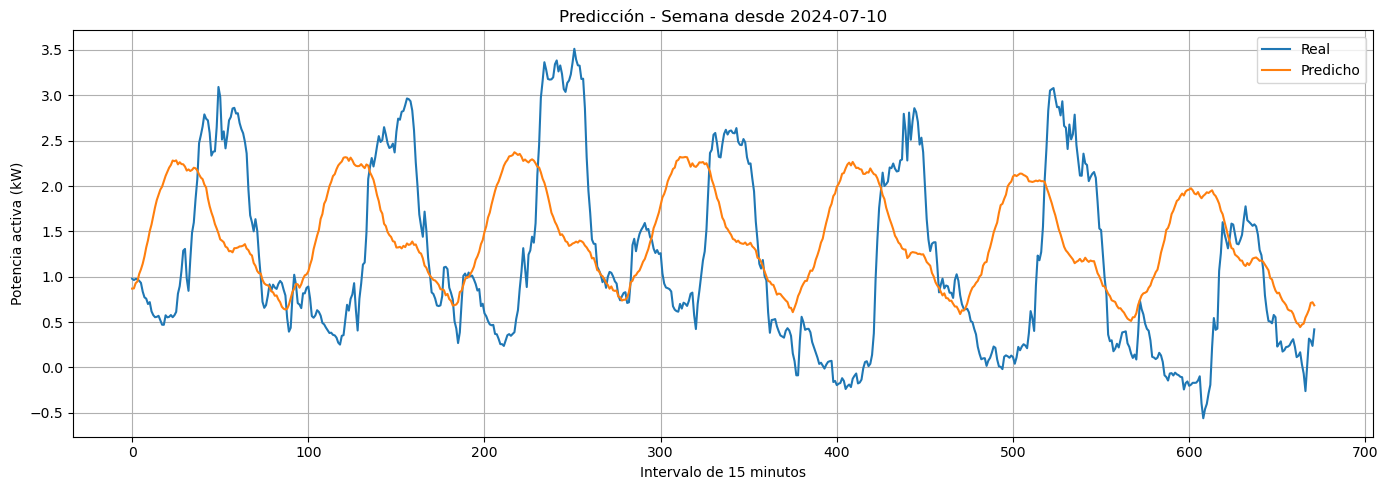


⏱ Tiempo de ejecución: 8.06 minutos


In [67]:
# Ejecutar entrenamiento
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-07-10"
)

## San felipe T1 (hora, dia semana, es laboral)

In [64]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm.notebook import tqdm
import random
import tensorflow as tf
from tensorflow.keras.initializers import GlorotUniform

#  Reproducibilidad total
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# MAPE personalizado 
def calcular_mape(y_true, y_pred, min_denominador=1e-3):
    denom = np.maximum(np.abs(y_true), min_denominador)
    return np.mean(np.abs((y_true - y_pred) / denom))

#  Crear ventanas con variables adicionales 
def crear_ventanas(df, col_obj, lag, horizonte, features_extra=None):
    X, y, fechas = [], [], []
    serie = df[col_obj].values
    if features_extra is not None:
        extras = df[features_extra].values
    for i in range(lag, len(serie) - horizonte + 1):
        obj_window = serie[i - lag:i].reshape(-1, 1)
        if features_extra is not None:
            extra_window = extras[i - lag:i]
            X.append(np.hstack([obj_window, extra_window]))
        else:
            X.append(obj_window)
        y.append(serie[i:i + horizonte])
        fechas.append(df['Fecha y hora'].iloc[i + horizonte - 1])
    return np.array(X), np.array(y), fechas

# Evaluación de configuración 
def evaluar_una_configuracion(df, col_obj, lag, horizonte, units, batch_size, epochs, fecha):
    tiempo_inicio = time.time()

    #  Fechas 
    fecha_inicio_test = pd.to_datetime(fecha)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    inicio_entrenamiento = fecha_inicio_test - pd.Timedelta(days=365 + 21)
    fin_entrenamiento = fecha_inicio_test - pd.Timedelta(weeks=3, days=1)
    delta_lag = pd.Timedelta(minutes=15 * lag)

    df_train = df[(df['Fecha y hora'] >= inicio_entrenamiento) & (df['Fecha y hora'] <= fin_entrenamiento)].copy()
    df_test = df[(df['Fecha y hora'] >= (fecha_inicio_test - delta_lag)) & (df['Fecha y hora'] < fecha_fin_test)].copy()

    if len(df_test) < (lag + horizonte):
        print(f" No hay suficientes datos para test: {len(df_test)} disponibles, se necesitan al menos {lag + horizonte}")
        return None, None, None

    #  Variables adicionales
    features_extra = ['hora_sin', 'hora_cos', 'dia_semana_sin', 'dia_semana_cos', 'es_laboral']

    #  Escalado solo de la variable objetivo 
    scaler = MinMaxScaler()
    df_train.loc[:, col_obj] = scaler.fit_transform(df_train[[col_obj]])
    df_test.loc[:, col_obj] = scaler.transform(df_test[[col_obj]])

    # Ventanas 
    X_train, y_train, _ = crear_ventanas(df_train, col_obj, lag, horizonte, features_extra)
    X_test, y_test, fechas_pred = crear_ventanas(df_test, col_obj, lag, horizonte, features_extra)

    #  Modelo 
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = Sequential()
    model.add(LSTM(units=units,
                   activation='tanh',
                   input_shape=input_shape,
                   kernel_initializer=GlorotUniform(seed=42),
                   recurrent_initializer=GlorotUniform(seed=42)))
    model.add(Dense(horizonte, kernel_initializer=GlorotUniform(seed=42)))
    model.compile(optimizer='adam', loss='mse')

    print("\n Entrenando modelo:")
    for i in tqdm(range(epochs), desc="Progreso", unit="epoch"):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, shuffle=False, verbose=0)

    #  Evaluación en entrenamiento usando misma lógica que test 
    fecha_fin_eval_train = df_train['Fecha y hora'].max()
    fecha_inicio_eval_train = fecha_fin_eval_train - pd.Timedelta(days=7)

    eval_train = df_train[(df_train['Fecha y hora'] >= (fecha_inicio_eval_train - delta_lag)) &
                          (df_train['Fecha y hora'] <= fecha_fin_eval_train)].copy()

    min_filas_requeridas = lag + horizonte
    if len(eval_train) < min_filas_requeridas:
        print(f" Solo hay {len(eval_train)} filas en la evaluación de entrenamiento. Se requieren al menos {min_filas_requeridas}.")
        return None, None, None

    X_train_eval, y_train_eval, _ = crear_ventanas(eval_train, col_obj, lag, horizonte, features_extra)

    if X_train_eval.shape[0] == 0:
        print(" No se pudieron crear ventanas con los datos de entrenamiento.")
        return None, None, None

    print(f" Ventanas creadas para entrenamiento: {X_train_eval.shape[0]}")
    print(f" Ventanas creadas para test: {X_test.shape[0]}")

    #  Predicción entrenamiento 
    y_train_pred = model.predict(X_train_eval)
    y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).reshape(y_train_pred.shape)
    y_train_real_inv = scaler.inverse_transform(y_train_eval.reshape(-1, 1)).reshape(y_train_eval.shape)

    mae_train = mean_absolute_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten())
    rmse_train = np.sqrt(mean_squared_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten()))
    mape_train = calcular_mape(y_train_real_inv.flatten(), y_train_pred_inv.flatten()) * 100

    print(f"\n ENTRENAMIENTO")
    print(f"MAE: {mae_train:.2f} | RMSE: {rmse_train:.2f} | MAPE: {mape_train:.2f}%")

    #  Evaluación test 
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
    y_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

    mae = mean_absolute_error(y_real_inv.flatten(), y_pred_inv.flatten())
    rmse = np.sqrt(mean_squared_error(y_real_inv.flatten(), y_pred_inv.flatten()))
    mape = calcular_mape(y_real_inv.flatten(), y_pred_inv.flatten(), min_denominador=1.0) * 100

    print(f"\n VALIDACIÓN SEMANAL")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")

    resumen = pd.DataFrame({
        'Dataset': ['Entrenamiento', 'Validación'],
        'MAE': [mae_train, mae],
        'RMSE': [rmse_train, rmse],
        'MAPE (%)': [mape_train, mape]
    })

    try:
        from IPython.display import display
    except ImportError:
        display = print
    display(resumen.round(2))

    #  Gráfico 
    plt.figure(figsize=(14, 5))
    plt.plot(y_real_inv[0], label='Real')
    plt.plot(y_pred_inv[0], label='Predicho')
    plt.title(f'Predicción - Semana desde {fecha_inicio_test.date()}')
    plt.xlabel('Intervalo de 15 minutos')
    plt.ylabel('Potencia activa (kW)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    tiempo_total = time.time() - tiempo_inicio
    print(f"\n Tiempo de ejecución: {round(tiempo_total / 60, 2)} minutos")

    return mae, rmse, mape




 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step

 ENTRENAMIENTO
MAE: 0.36 | RMSE: 0.44 | MAPE: 8.77%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step

 VALIDACIÓN SEMANAL
MAE: 0.87 | RMSE: 1.06 | MAPE: 21.98%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.36,0.44,8.77
1,Validación,0.87,1.06,21.98


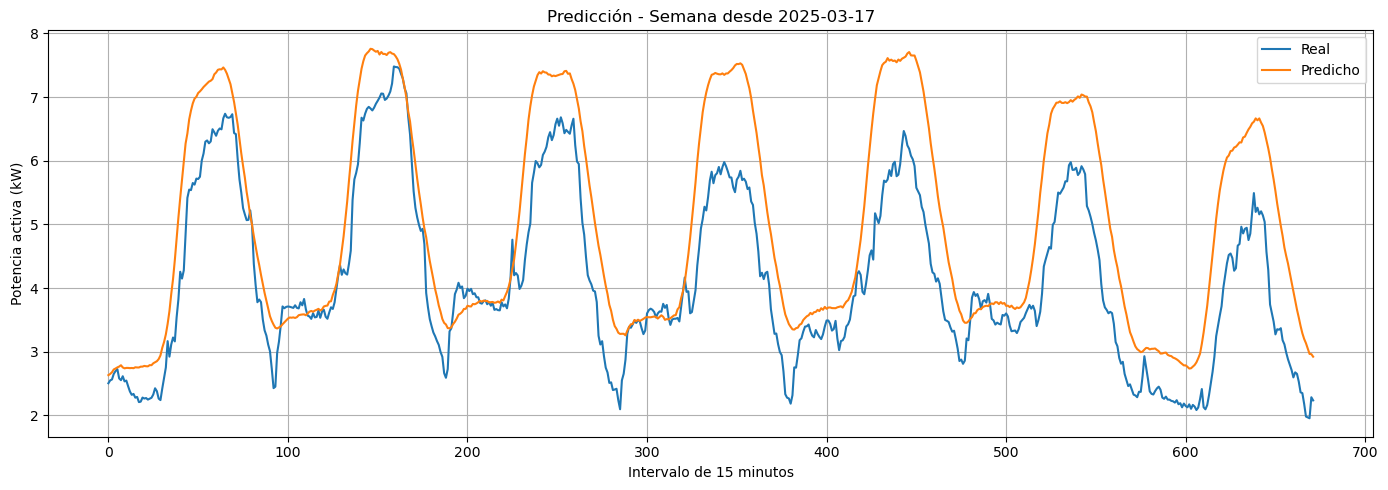


 Tiempo de ejecución: 5.67 minutos


In [65]:
#  EJECUCIÓN 
df_modelo = df_final[(df_final['transformador'] == 'San_Felipe_T1') & (df_final['tipo'] == 'Q')].copy()
df_modelo = df_modelo.sort_values('Fecha y hora')

# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-03-17"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step

 ENTRENAMIENTO
MAE: 0.35 | RMSE: 0.47 | MAPE: 8.31%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step

 VALIDACIÓN SEMANAL
MAE: 0.66 | RMSE: 0.80 | MAPE: 13.97%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.35,0.47,8.31
1,Validación,0.66,0.80,13.97


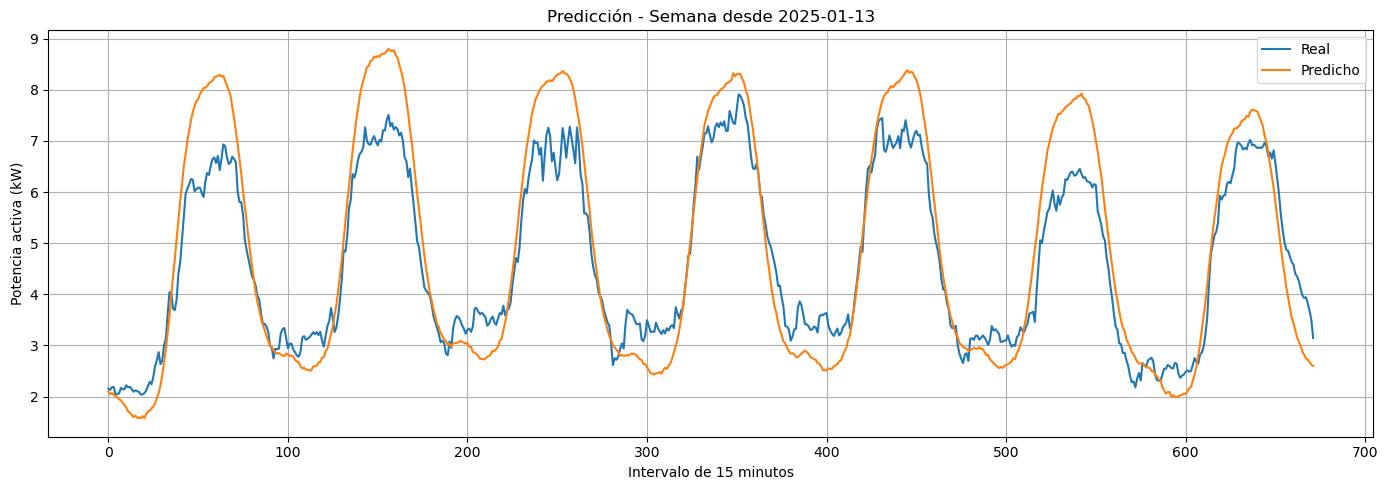


 Tiempo de ejecución: 5.84 minutos


In [66]:
# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-01-13"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

 ENTRENAMIENTO
MAE: 0.59 | RMSE: 0.79 | MAPE: 38.35%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step

 VALIDACIÓN SEMANAL
MAE: 1.78 | RMSE: 2.11 | MAPE: 56.07%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.59,0.79,38.35
1,Validación,1.78,2.11,56.07


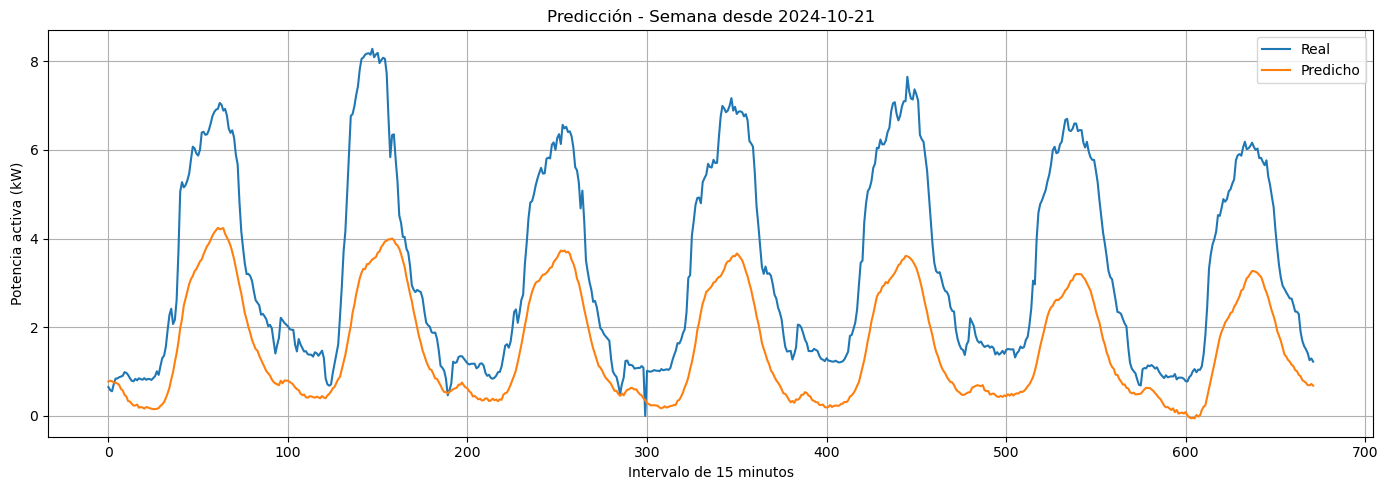


 Tiempo de ejecución: 5.7 minutos


In [67]:
# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-10-21"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step

 ENTRENAMIENTO
MAE: 0.49 | RMSE: 0.77 | MAPE: 11761.73%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step

 VALIDACIÓN SEMANAL
MAE: 0.53 | RMSE: 0.65 | MAPE: 44.22%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.49,0.77,11761.73
1,Validación,0.53,0.65,44.22


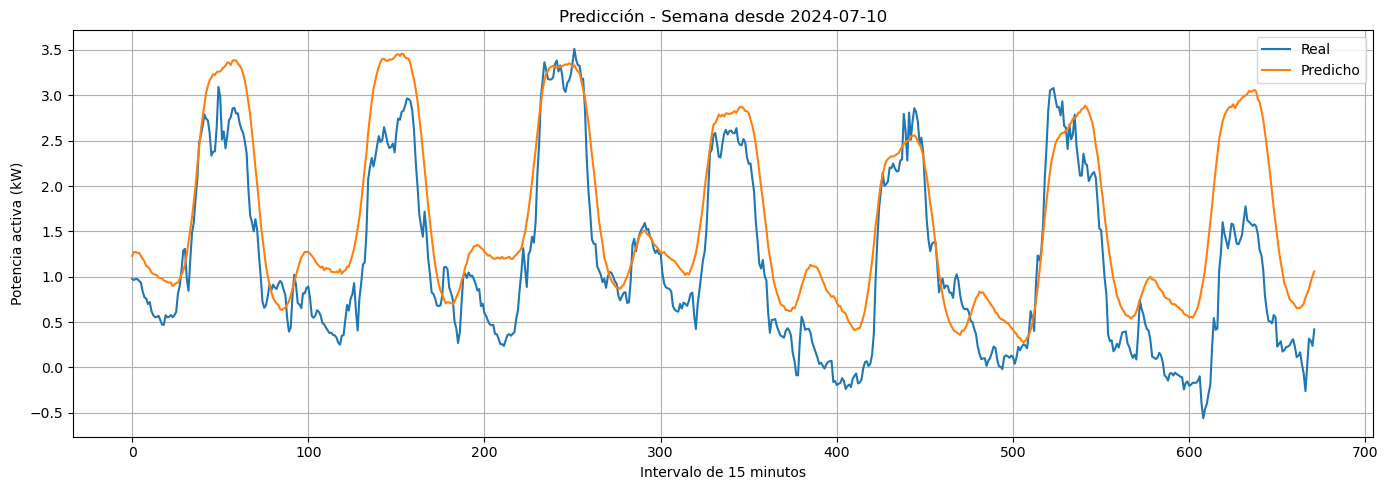


 Tiempo de ejecución: 6.1 minutos


In [68]:
# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-07-10"
)

## San felipe T1 (hora, dia semana, es laboral, estacion del año)

In [70]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm.notebook import tqdm
import random
import tensorflow as tf
from tensorflow.keras.initializers import GlorotUniform

#  Reproducibilidad total
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# MAPE personalizado 
def calcular_mape(y_true, y_pred, min_denominador=1e-3):
    denom = np.maximum(np.abs(y_true), min_denominador)
    return np.mean(np.abs((y_true - y_pred) / denom))

#  Crear ventanas con variables adicionales
def crear_ventanas(df, col_obj, lag, horizonte, features_extra=None):
    X, y, fechas = [], [], []
    serie = df[col_obj].values
    if features_extra is not None:
        extras = df[features_extra].values
    for i in range(lag, len(serie) - horizonte + 1):
        obj_window = serie[i - lag:i].reshape(-1, 1)
        if features_extra is not None:
            extra_window = extras[i - lag:i]
            X.append(np.hstack([obj_window, extra_window]))
        else:
            X.append(obj_window)
        y.append(serie[i:i + horizonte])
        fechas.append(df['Fecha y hora'].iloc[i + horizonte - 1])
    return np.array(X), np.array(y), fechas

#  Evaluación de configuración 
def evaluar_una_configuracion(df, col_obj, lag, horizonte, units, batch_size, epochs, fecha):
    tiempo_inicio = time.time()

    #  Fechas 
    fecha_inicio_test = pd.to_datetime(fecha)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    inicio_entrenamiento = fecha_inicio_test - pd.Timedelta(days=365 + 21)
    fin_entrenamiento = fecha_inicio_test - pd.Timedelta(weeks=3, days=1)
    delta_lag = pd.Timedelta(minutes=15 * lag)

    df_train = df[(df['Fecha y hora'] >= inicio_entrenamiento) & (df['Fecha y hora'] <= fin_entrenamiento)].copy()
    df_test = df[(df['Fecha y hora'] >= (fecha_inicio_test - delta_lag)) & (df['Fecha y hora'] < fecha_fin_test)].copy()

    if len(df_test) < (lag + horizonte):
        print(f" No hay suficientes datos para test: {len(df_test)} disponibles, se necesitan al menos {lag + horizonte}")
        return None, None, None

    #  Variables adicionales 
    features_extra = ['hora_sin', 'hora_cos', 'dia_semana_sin', 'dia_semana_cos', 'es_laboral', 'estacion_otoño', 'estacion_invierno', 'estacion_primavera']

    #  Escalado solo de la variable objetivo 
    scaler = MinMaxScaler()
    df_train.loc[:, col_obj] = scaler.fit_transform(df_train[[col_obj]])
    df_test.loc[:, col_obj] = scaler.transform(df_test[[col_obj]])

    #  Ventanas
    X_train, y_train, _ = crear_ventanas(df_train, col_obj, lag, horizonte, features_extra)
    X_test, y_test, fechas_pred = crear_ventanas(df_test, col_obj, lag, horizonte, features_extra)

    #  Modelo
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = Sequential()
    model.add(LSTM(units=units,
                   activation='tanh',
                   input_shape=input_shape,
                   kernel_initializer=GlorotUniform(seed=42),
                   recurrent_initializer=GlorotUniform(seed=42)))
    model.add(Dense(horizonte, kernel_initializer=GlorotUniform(seed=42)))
    model.compile(optimizer='adam', loss='mse')

    print("\n Entrenando modelo:")
    for i in tqdm(range(epochs), desc="Progreso", unit="epoch"):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, shuffle=False, verbose=0)

    #  Evaluación en entrenamiento usando misma lógica que test 
    fecha_fin_eval_train = df_train['Fecha y hora'].max()
    fecha_inicio_eval_train = fecha_fin_eval_train - pd.Timedelta(days=7)

    eval_train = df_train[(df_train['Fecha y hora'] >= (fecha_inicio_eval_train - delta_lag)) &
                          (df_train['Fecha y hora'] <= fecha_fin_eval_train)].copy()

    min_filas_requeridas = lag + horizonte
    if len(eval_train) < min_filas_requeridas:
        print(f" Solo hay {len(eval_train)} filas en la evaluación de entrenamiento. Se requieren al menos {min_filas_requeridas}.")
        return None, None, None

    X_train_eval, y_train_eval, _ = crear_ventanas(eval_train, col_obj, lag, horizonte, features_extra)

    if X_train_eval.shape[0] == 0:
        print(" No se pudieron crear ventanas con los datos de entrenamiento.")
        return None, None, None

    print(f" Ventanas creadas para entrenamiento: {X_train_eval.shape[0]}")
    print(f" Ventanas creadas para test: {X_test.shape[0]}")

    #  Predicción entrenamiento 
    y_train_pred = model.predict(X_train_eval)
    y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).reshape(y_train_pred.shape)
    y_train_real_inv = scaler.inverse_transform(y_train_eval.reshape(-1, 1)).reshape(y_train_eval.shape)

    mae_train = mean_absolute_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten())
    rmse_train = np.sqrt(mean_squared_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten()))
    mape_train = calcular_mape(y_train_real_inv.flatten(), y_train_pred_inv.flatten()) * 100

    print(f"\n ENTRENAMIENTO")
    print(f"MAE: {mae_train:.2f} | RMSE: {rmse_train:.2f} | MAPE: {mape_train:.2f}%")

    #  Evaluación test 
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
    y_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

    mae = mean_absolute_error(y_real_inv.flatten(), y_pred_inv.flatten())
    rmse = np.sqrt(mean_squared_error(y_real_inv.flatten(), y_pred_inv.flatten()))
    mape = calcular_mape(y_real_inv.flatten(), y_pred_inv.flatten(), min_denominador=1.0) * 100

    print(f"\n VALIDACIÓN SEMANAL")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")

    resumen = pd.DataFrame({
        'Dataset': ['Entrenamiento', 'Validación'],
        'MAE': [mae_train, mae],
        'RMSE': [rmse_train, rmse],
        'MAPE (%)': [mape_train, mape]
    })

    try:
        from IPython.display import display
    except ImportError:
        display = print
    display(resumen.round(2))

    # Gráfico 
    plt.figure(figsize=(14, 5))
    plt.plot(y_real_inv[0], label='Real')
    plt.plot(y_pred_inv[0], label='Predicho')
    plt.title(f'Predicción - Semana desde {fecha_inicio_test.date()}')
    plt.xlabel('Intervalo de 15 minutos')
    plt.ylabel('Potencia activa (kW)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    tiempo_total = time.time() - tiempo_inicio
    print(f"\n Tiempo de ejecución: {round(tiempo_total / 60, 2)} minutos")

    return mae, rmse, mape



 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step

 ENTRENAMIENTO
MAE: 0.38 | RMSE: 0.46 | MAPE: 8.72%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step

 VALIDACIÓN SEMANAL
MAE: 1.79 | RMSE: 1.94 | MAPE: 43.90%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.38,0.46,8.72
1,Validación,1.79,1.94,43.90


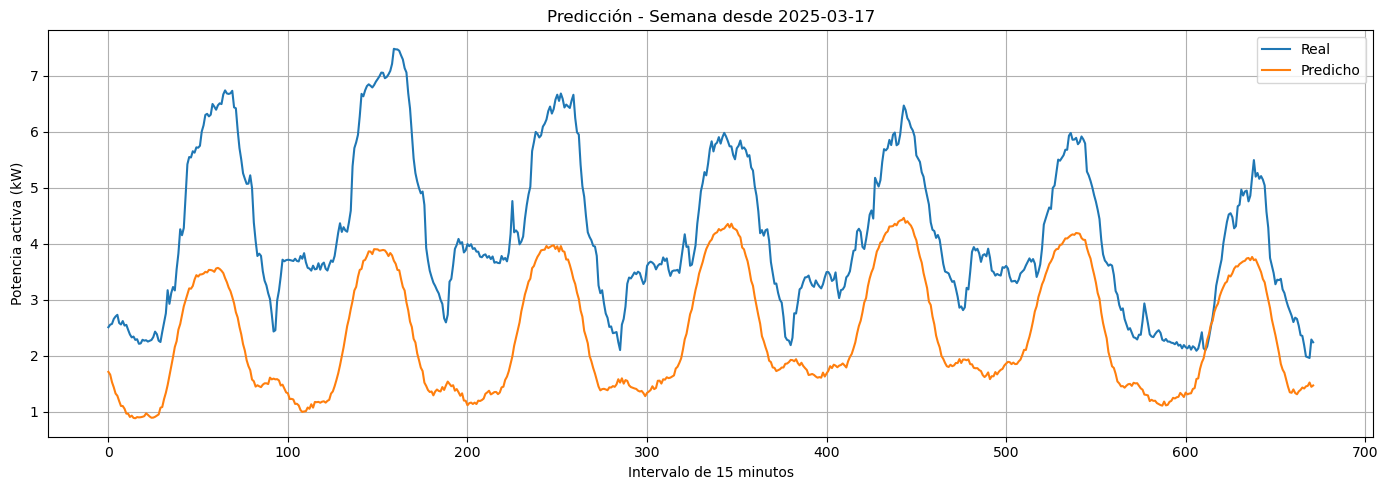


 Tiempo de ejecución: 5.72 minutos


In [71]:
#  EJECUCIÓN 
df_modelo = df_final[(df_final['transformador'] == 'San_Felipe_T1') & (df_final['tipo'] == 'Q')].copy()
df_modelo = df_modelo.sort_values('Fecha y hora')
bool_cols = ['estacion_invierno', 'estacion_otoño', 'estacion_primavera']
df_modelo[bool_cols] = df_modelo[bool_cols].astype(int)

# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-03-17"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step

 ENTRENAMIENTO
MAE: 0.36 | RMSE: 0.48 | MAPE: 8.50%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step

 VALIDACIÓN SEMANAL
MAE: 0.76 | RMSE: 0.91 | MAPE: 16.08%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.36,0.48,8.50
1,Validación,0.76,0.91,16.08


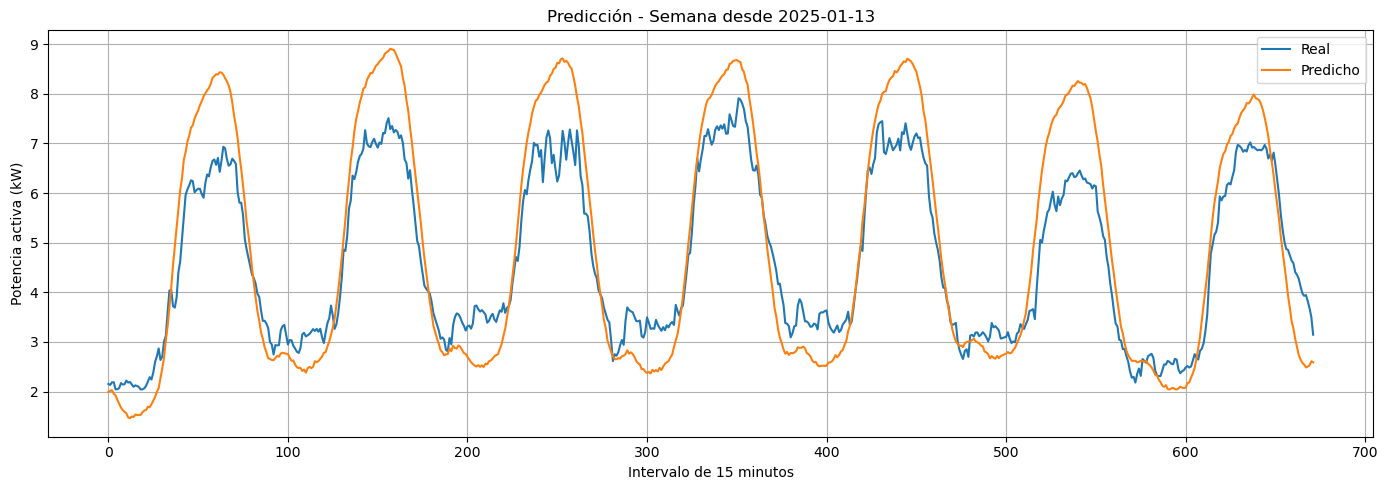


 Tiempo de ejecución: 5.92 minutos


In [72]:
# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-01-13"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

 ENTRENAMIENTO
MAE: 0.69 | RMSE: 0.85 | MAPE: 60.53%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step

 VALIDACIÓN SEMANAL
MAE: 1.81 | RMSE: 2.11 | MAPE: 59.58%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.69,0.85,60.53
1,Validación,1.81,2.11,59.58


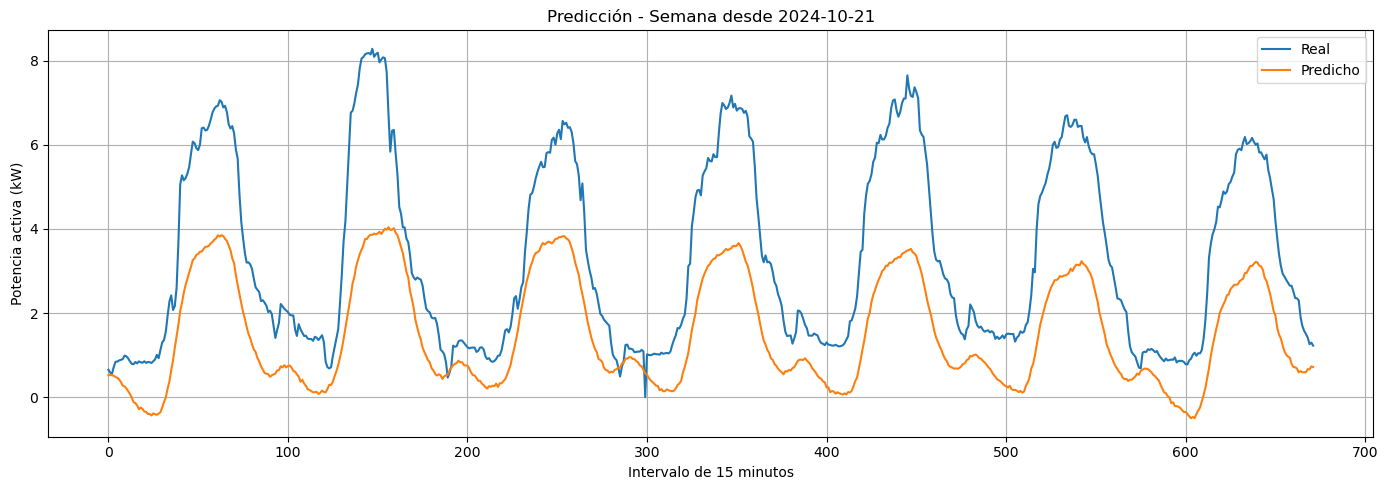


 Tiempo de ejecución: 5.76 minutos


In [73]:
# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-10-21"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step

 ENTRENAMIENTO
MAE: 0.46 | RMSE: 0.75 | MAPE: 11838.60%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step

 VALIDACIÓN SEMANAL
MAE: 0.48 | RMSE: 0.61 | MAPE: 38.99%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.46,0.75,11838.60
1,Validación,0.48,0.61,38.99


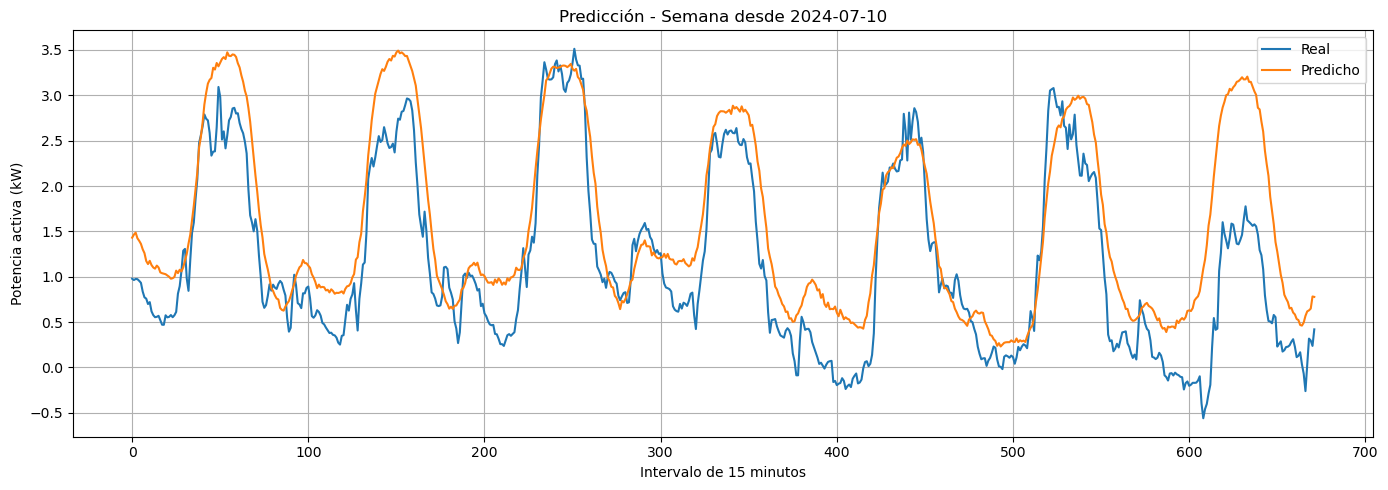


 Tiempo de ejecución: 5.63 minutos


In [74]:
# Ejecutar entrenamiento con features adicionales
mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-07-10"
)

## San felipe T1 (hora, dia semana, es laboral, data meteo)

In [65]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tqdm.notebook import tqdm
import random
import tensorflow as tf
from tensorflow.keras.initializers import GlorotUniform

# === Reproducibilidad total ===
os.environ['PYTHONHASHSEED'] = '42'
os.environ['TF_DETERMINISTIC_OPS'] = '1'
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

# === MAPE personalizado ===
def calcular_mape(y_true, y_pred, min_denominador=1e-3):
    denom = np.maximum(np.abs(y_true), min_denominador)
    return np.mean(np.abs((y_true - y_pred) / denom))

# === Crear ventanas con variables adicionales ===
def crear_ventanas(df, col_obj, lag, horizonte, features_extra=None):
    X, y, fechas = [], [], []
    serie = df[col_obj].values
    if features_extra is not None:
        extras = df[features_extra].values
    for i in range(lag, len(serie) - horizonte + 1):
        obj_window = serie[i - lag:i].reshape(-1, 1)
        if features_extra is not None:
            extra_window = extras[i - lag:i]
            X.append(np.hstack([obj_window, extra_window]))
        else:
            X.append(obj_window)
        y.append(serie[i:i + horizonte])
        fechas.append(df['Fecha y hora'].iloc[i + horizonte - 1])
    return np.array(X), np.array(y), fechas

# === Evaluación de configuración ===
def evaluar_una_configuracion(df, col_obj, lag, horizonte, units, batch_size, epochs, fecha):
    tiempo_inicio = time.time()

    # === Fechas ===
    fecha_inicio_test = pd.to_datetime(fecha)
    fecha_fin_test = fecha_inicio_test + pd.Timedelta(days=7)
    inicio_entrenamiento = fecha_inicio_test - pd.Timedelta(days=365 + 21)
    fin_entrenamiento = fecha_inicio_test - pd.Timedelta(weeks=3, days=1)
    delta_lag = pd.Timedelta(minutes=15 * lag)

    df_train = df[(df['Fecha y hora'] >= inicio_entrenamiento) & (df['Fecha y hora'] <= fin_entrenamiento)].copy()
    df_test = df[(df['Fecha y hora'] >= (fecha_inicio_test - delta_lag)) & (df['Fecha y hora'] < fecha_fin_test)].copy()

    if len(df_test) < (lag + horizonte):
        print(f" No hay suficientes datos para test: {len(df_test)} disponibles, se necesitan al menos {lag + horizonte}")
        return None, None, None

    # === Variables adicionales ===
    features_extra = ['hora_sin', 'hora_cos', 'dia_semana_sin', 'dia_semana_cos', 'es_laboral','Temp - °C']

    # === Escalado solo de la variable objetivo ===
    scaler = MinMaxScaler()
    df_train.loc[:, col_obj] = scaler.fit_transform(df_train[[col_obj]])
    df_test.loc[:, col_obj] = scaler.transform(df_test[[col_obj]])

    # === Ventanas ===
    X_train, y_train, _ = crear_ventanas(df_train, col_obj, lag, horizonte, features_extra)
    X_test, y_test, fechas_pred = crear_ventanas(df_test, col_obj, lag, horizonte, features_extra)

    # === Modelo ===
    input_shape = (X_train.shape[1], X_train.shape[2])
    model = Sequential()
    model.add(LSTM(units=units,
                   activation='tanh',
                   input_shape=input_shape,
                   kernel_initializer=GlorotUniform(seed=42),
                   recurrent_initializer=GlorotUniform(seed=42)))
    model.add(Dense(horizonte, kernel_initializer=GlorotUniform(seed=42)))
    model.compile(optimizer='adam', loss='mse')

    print("\n Entrenando modelo:")
    for i in tqdm(range(epochs), desc="Progreso", unit="epoch"):
        model.fit(X_train, y_train, epochs=1, batch_size=batch_size, shuffle=False, verbose=0)

    # === Evaluación en entrenamiento usando misma lógica que test ===
    fecha_fin_eval_train = df_train['Fecha y hora'].max()
    fecha_inicio_eval_train = fecha_fin_eval_train - pd.Timedelta(days=7)

    eval_train = df_train[(df_train['Fecha y hora'] >= (fecha_inicio_eval_train - delta_lag)) &
                          (df_train['Fecha y hora'] <= fecha_fin_eval_train)].copy()

    min_filas_requeridas = lag + horizonte
    if len(eval_train) < min_filas_requeridas:
        print(f" Solo hay {len(eval_train)} filas en la evaluación de entrenamiento. Se requieren al menos {min_filas_requeridas}.")
        return None, None, None

    X_train_eval, y_train_eval, _ = crear_ventanas(eval_train, col_obj, lag, horizonte, features_extra)

    if X_train_eval.shape[0] == 0:
        print(" No se pudieron crear ventanas con los datos de entrenamiento.")
        return None, None, None

    print(f" Ventanas creadas para entrenamiento: {X_train_eval.shape[0]}")
    print(f" Ventanas creadas para test: {X_test.shape[0]}")

    # === Predicción entrenamiento ===
    y_train_pred = model.predict(X_train_eval)
    y_train_pred_inv = scaler.inverse_transform(y_train_pred.reshape(-1, 1)).reshape(y_train_pred.shape)
    y_train_real_inv = scaler.inverse_transform(y_train_eval.reshape(-1, 1)).reshape(y_train_eval.shape)

    mae_train = mean_absolute_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten())
    rmse_train = np.sqrt(mean_squared_error(y_train_real_inv.flatten(), y_train_pred_inv.flatten()))
    mape_train = calcular_mape(y_train_real_inv.flatten(), y_train_pred_inv.flatten()) * 100

    print(f"\n ENTRENAMIENTO")
    print(f"MAE: {mae_train:.2f} | RMSE: {rmse_train:.2f} | MAPE: {mape_train:.2f}%")

    # === Evaluación test ===
    y_pred = model.predict(X_test)
    y_pred_inv = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(y_pred.shape)
    y_real_inv = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(y_test.shape)

    mae = mean_absolute_error(y_real_inv.flatten(), y_pred_inv.flatten())
    rmse = np.sqrt(mean_squared_error(y_real_inv.flatten(), y_pred_inv.flatten()))
    mape = calcular_mape(y_real_inv.flatten(), y_pred_inv.flatten(), min_denominador=1.0) * 100

    print(f"\n VALIDACIÓN SEMANAL")
    print(f"MAE: {mae:.2f} | RMSE: {rmse:.2f} | MAPE: {mape:.2f}%")

    resumen = pd.DataFrame({
        'Dataset': ['Entrenamiento', 'Validación'],
        'MAE': [mae_train, mae],
        'RMSE': [rmse_train, rmse],
        'MAPE (%)': [mape_train, mape]
    })

    try:
        from IPython.display import display
    except ImportError:
        display = print
    display(resumen.round(2))

    # === Gráfico ===
    plt.figure(figsize=(14, 5))
    plt.plot(y_real_inv[0], label='Real')
    plt.plot(y_pred_inv[0], label='Predicho')
    plt.title(f'Predicción - Semana desde {fecha_inicio_test.date()}')
    plt.xlabel('Intervalo de 15 minutos')
    plt.ylabel('Potencia activa (kW)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    tiempo_total = time.time() - tiempo_inicio
    print(f"\n Tiempo de ejecución: {round(tiempo_total / 60, 2)} minutos")

    return mae, rmse, mape


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step

 ENTRENAMIENTO
MAE: 0.40 | RMSE: 0.49 | MAPE: 9.05%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

 VALIDACIÓN SEMANAL
MAE: 0.83 | RMSE: 1.02 | MAPE: 20.06%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.40,0.49,9.05
1,Validación,0.83,1.02,20.06


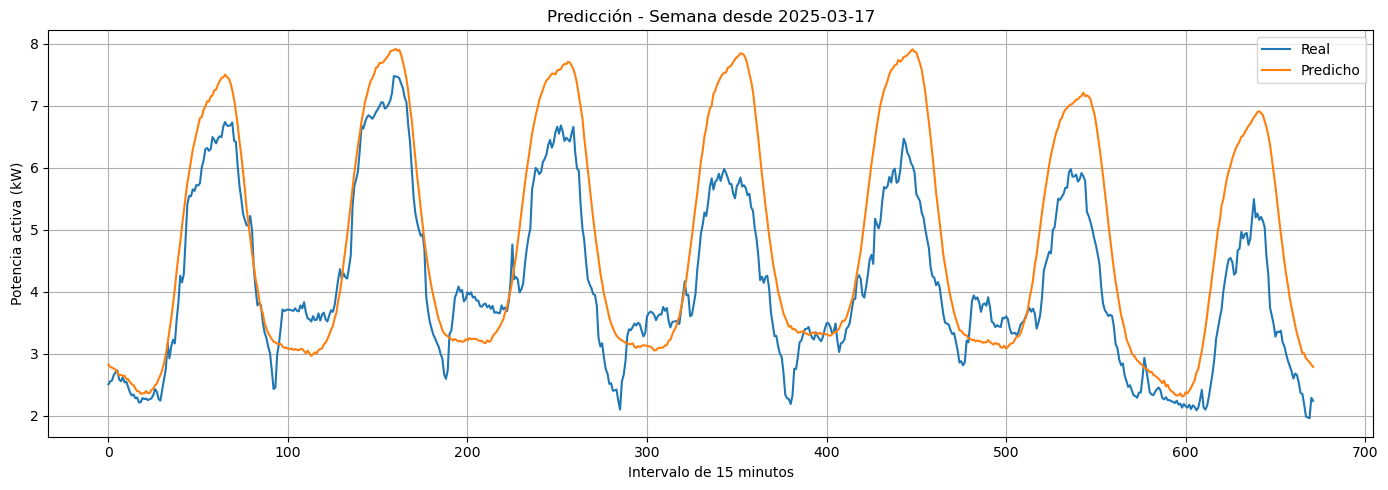


 Tiempo de ejecución: 5.92 minutos


In [70]:
# === EJECUCIÓN EJEMPLO ===
df_modelo = df_final[(df_final['transformador'] == 'San_Felipe_T1') & (df_final['tipo'] == 'Q')].copy()
df_modelo = df_modelo.sort_values('Fecha y hora')
bool_cols = ['estacion_invierno', 'estacion_otoño', 'estacion_primavera']
df_modelo[bool_cols] = df_modelo[bool_cols].astype(int)


mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-03-17"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step

 ENTRENAMIENTO
MAE: 0.40 | RMSE: 0.54 | MAPE: 9.33%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step

 VALIDACIÓN SEMANAL
MAE: 0.79 | RMSE: 0.96 | MAPE: 16.25%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.40,0.54,9.33
1,Validación,0.79,0.96,16.25


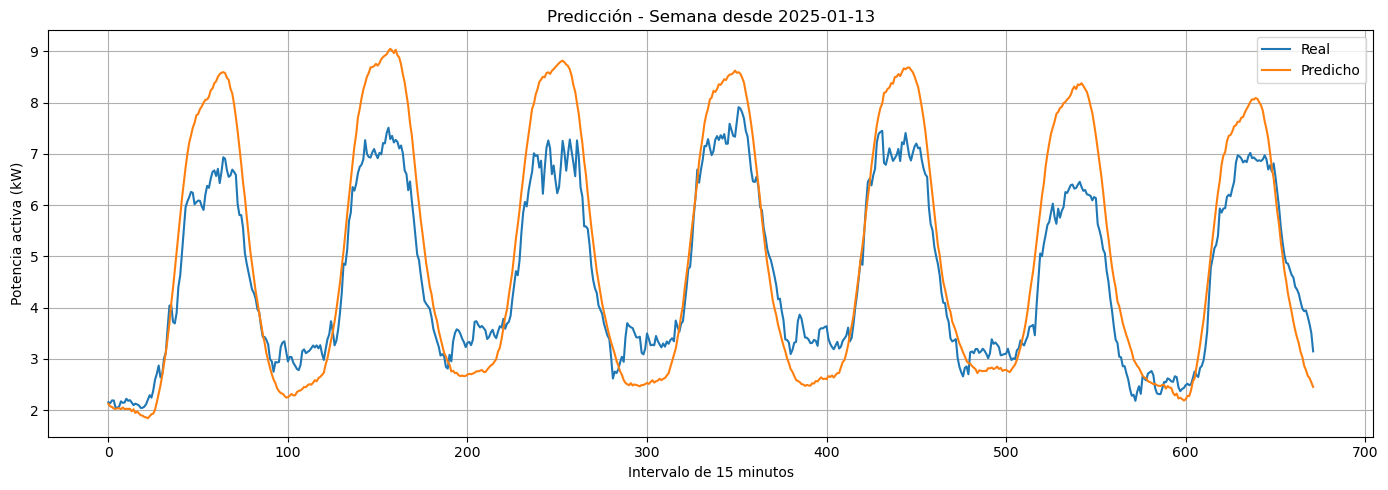


 Tiempo de ejecución: 6.09 minutos


In [69]:
# === EJECUCIÓN EJEMPLO ===
df_modelo = df_final[(df_final['transformador'] == 'San_Felipe_T1') & (df_final['tipo'] == 'Q')].copy()
df_modelo = df_modelo.sort_values('Fecha y hora')
bool_cols = ['estacion_invierno', 'estacion_otoño', 'estacion_primavera']
df_modelo[bool_cols] = df_modelo[bool_cols].astype(int)
#Ejecución

mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2025-01-13"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step

 ENTRENAMIENTO
MAE: 0.66 | RMSE: 0.82 | MAPE: 50.04%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step

 VALIDACIÓN SEMANAL
MAE: 1.75 | RMSE: 2.05 | MAPE: 55.99%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.66,0.82,50.04
1,Validación,1.75,2.05,55.99


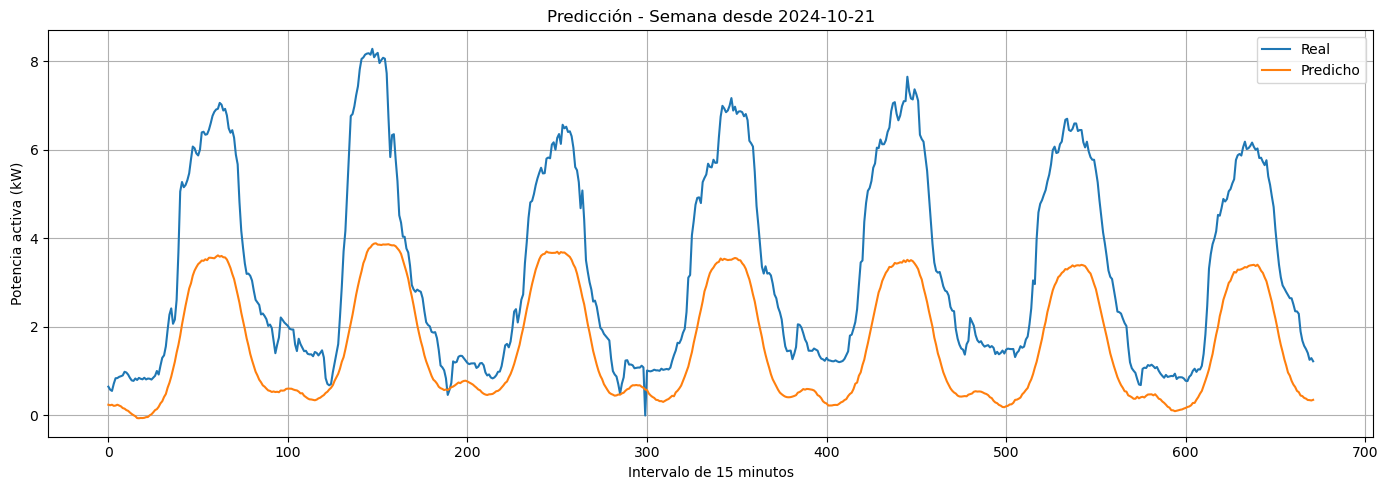


 Tiempo de ejecución: 5.83 minutos


In [71]:
# === EJECUCIÓN EJEMPLO ===

mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-10-21"
)


 Entrenando modelo:


C:\Users\carol\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Progreso:   0%|          | 0/25 [00:00<?, ?epoch/s]

 Ventanas creadas para entrenamiento: 2
 Ventanas creadas para test: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

 ENTRENAMIENTO
MAE: 0.48 | RMSE: 0.75 | MAPE: 11559.43%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step

 VALIDACIÓN SEMANAL
MAE: 0.64 | RMSE: 0.79 | MAPE: 48.06%


,Dataset,MAE,RMSE,MAPE (%)
0,Entrenamiento,0.48,0.75,11559.43
1,Validación,0.64,0.79,48.06


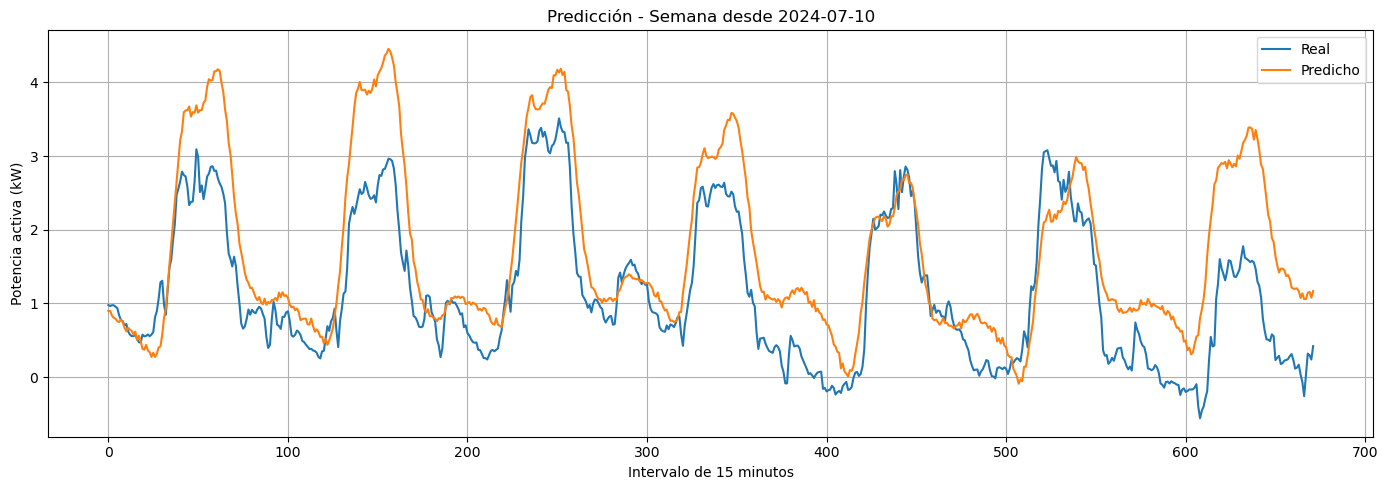


 Tiempo de ejecución: 6.22 minutos


In [72]:
# === EJECUCIÓN EJEMPLO ===

mae, rmse, mape = evaluar_una_configuracion(
    df=df_modelo,
    col_obj='valor',
    lag=24,
    horizonte=672,
    units=100,
    batch_size=32,
    epochs=25,
    fecha="2024-07-10"
)